## Instructions:

In this R Markdown document, you and your team will create a fully reproducible analysis with the goal of assessing and interpreting the replicability of two pharmacogenomic experiments. This document should contain all of the text and code of your analyses, which will allow others to run, interpret, and reuse your work.

The questions below will help guide you in your analyses and interpretation of results. You don't need to answer every question, but for the problems you do complete, make sure that you completely justify your conclusions by explaining your reasoning and including numerical summaries and data visualizations wherever possible. There are four tutorials (also R Markdown documents) that will help you learn new tools to tackle these problems, and the questions are divided into four sections corresponding to the tutorials (though many overlap with more than one tutorial). If questions arise during your analyses that do not fit into these problems, feel free to include those as well. 

For each answer, include text by simply typing below the question. Include code in code blocks (include three back ticks at the start and end of each code block):

```{r}
#Your code goes here
```
You may find it helpful to use the version control and code sharing system called GitHub to work together with your team so that all of you can edit the same document and keep track of its changes. Here is a [setup guide](https://github.com/datasciencelabs/2016/blob/master/lectures/git-and-github/setting-up-git.Rmd) and [brief introduction to Git and GitHub](https://github.com/datasciencelabs/2016/blob/master/lectures/git-and-github/version-control.Rmd) from another course. The mentors will be able to help if you run into problems. 



## Questions:


#### Import packeges


In [1]:

library(tidyverse)


Warning message:
"package 'tidyverse' was built under R version 3.5.2"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
Warning message:
"package 'ggplot2' was built under R version 3.5.3"Warning message:
"package 'tibble' was built under R version 3.5.3"Warning message:
"package 'tidyr' was built under R version 3.5.3"Warning message:
"package 'readr' was built under R version 3.5.2"Warning message:
"package 'purrr' was built under R version 3.5.3"Warning message:
"package 'dplyr' was built under R version 3.5.3"Warning message:
"package 'stringr' was built under R version 3.5.3"Warning message:
"package 'forcats' was built under R version 3.5.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::la

### Read files

In [2]:
rawPharmacoData <- read_csv("../Data/rawPharmacoData.csv")
summarizedData <- read_csv("../Data/summarizedPharmacoData.csv")

Parsed with column specification:
cols(
  cellLine = col_character(),
  drug = col_character(),
  doseID = col_character(),
  concentration = col_double(),
  viability = col_double(),
  study = col_character()
)
Parsed with column specification:
cols(
  cellLine = col_character(),
  drug = col_character(),
  ic50_CCLE = col_double(),
  auc_CCLE = col_double(),
  ic50_GDSC = col_double(),
  auc_GDSC = col_double()
)


In [3]:
### Exploratory analysis of pharmacogenomic data

In [4]:
#1. How many cell-lines are contained in the data?

In [5]:
#Check number of unique variables within cell lines

n_distinct(rawPharmacoData$cellLine)
n_distinct(summarizedData$cellLine)

[1] 288

[1] 288

In [6]:
#2. What drug concentrations were used in each study?

In [7]:
rawPharmacoData %>%
  group_by(concentration) %>%
  count(study)

concentration,study,n
<dbl>,<chr>,<int>
4.000000e-04,GDSC,89
8.000000e-04,GDSC,89
9.765625e-04,GDSC,261
1.600000e-03,GDSC,89
1.953125e-03,GDSC,261
2.500000e-03,CCLE,2530
3.200000e-03,GDSC,89
3.906250e-03,GDSC,545
6.400000e-03,GDSC,89


3. Histograms, appart from telling how is the data
distributed, can also make evident potential
problems with the data. Plot a histogram
of drug viabilities. Does it look as one would
expect from the description of the data?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


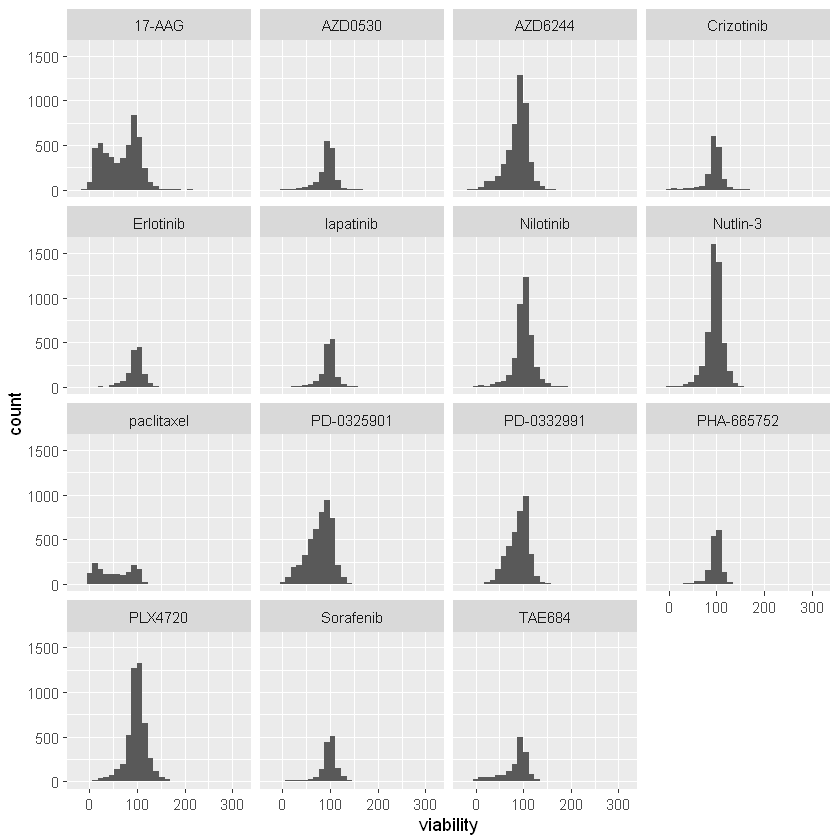

In [8]:
ggplot(rawPharmacoData, aes(x = viability)) +
  geom_histogram() +
  facet_wrap(~drug)

4. How many viability data points are within the
expected range according to the definition of viability (e.g. above 0  and below 100)? Try to come up with explanations about the values that are out of range. Are these due to technical issues? Biology?
```{r}```

In [9]:
rawPharmacoData %>%
  count(viability > 0 & viability < 100)

viability > 0 & viability < 100,n
<lgl>,<int>
FALSE,15816
TRUE,27611


> In these studies viability was measured in the relative number of cells that survive after drug exposure. Values above 100% could be explained by cell proliferation or by data entry errors.






5. Read the csv file containing the summarized data files. What kind
of variables are in the data? What does each column represents?
```{r}

In [10]:
glimpse(summarizedData)

Observations: 2,557
Variables: 6
$ cellLine  <chr> "22RV1", "5637", "639-V", "697", "769-P", "786-0", "8305C...
$ drug      <chr> "Nilotinib", "Nilotinib", "Nilotinib", "Nilotinib", "Nilo...
$ ic50_CCLE <dbl> 8.000000, 7.475355, 8.000000, 1.910434, 8.000000, 8.00000...
$ auc_CCLE  <dbl> 0.0000000, 0.0072625, 0.0710125, 0.1573375, 0.0000000, 0....
$ ic50_GDSC <dbl> 155.269917, 219.934550, 92.177125, 3.063552, 19.633514, 1...
$ auc_GDSC  <dbl> 0.003935, 0.003616, 0.007622, 0.069265, 0.028758, 0.00548...


> There are categorical and numeric variables. The CellLine column represents the cell line used in the experiment. Drug represents which drug was used. ic50 represents the drug concentration at which viability(survival of cells) reaches 50%. ic50_CCLE represents the ic50 for a given CCLE experiment. ic50_GDSC represents the ic50 for a given GDSC experiment. auc is the area under the curve, the curve referred to in this case is the dose response curve built for each drug, cell line, and study combination. auc_CCLE is the auc for a given CCLE experiment. auc_GDSC is the auc for a given GDSC experiment.


```


6. Plot a histogram of the viability scores as a function of the drug doses. Are stronger drug concentrations consistent with lower viability scores?
```{r}

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


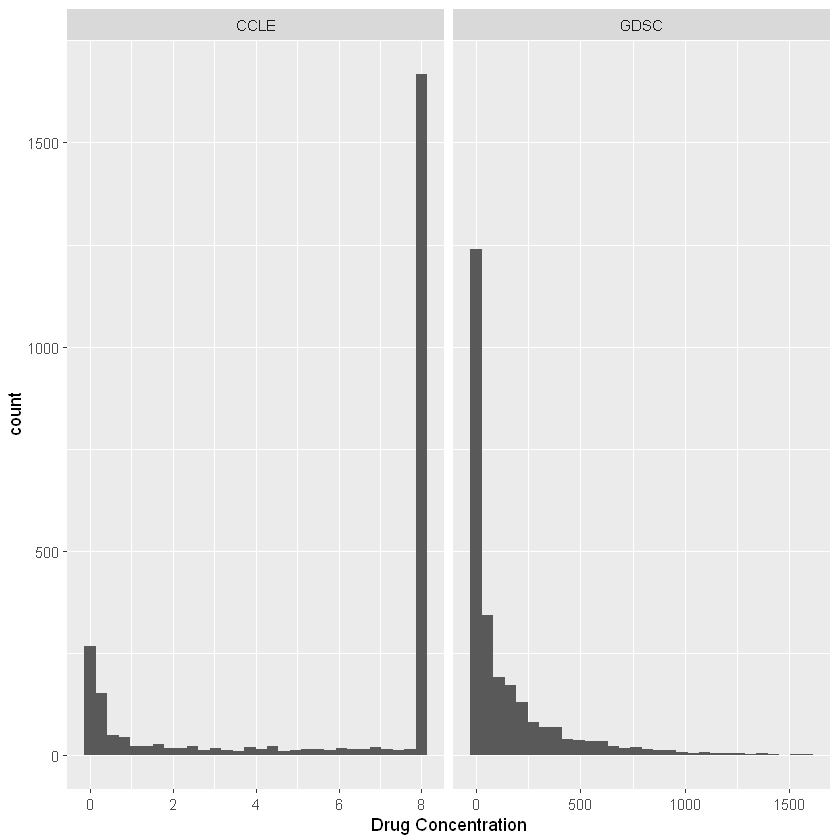

In [11]:
summarizedData %>%
    gather(measure, value, -cellLine, -drug) %>%
    separate(measure, c('measure','study'), sep = '_') %>%
    filter(measure == 'ic50') %>%
ggplot(aes(x = value)) +
  geom_histogram() +
  facet_wrap(.~study, scales = 'free_x') +
labs(x = "Drug Concentration")

> Data from the CCLE study makes it seem like yes, the higher the concentration, the lower the viability values. This is not true for the GDSC data, however, the histogram is representing much higher doses than the CCLE experiment.




```


### Using Correlation Measures to Assess Replicability of Drug Response Studies

1. Create a scatterplot for each drug comparing the AUC in GDSC and CCLE for all cell lines (hint: code from Tutorial 2 may help).
```{r}

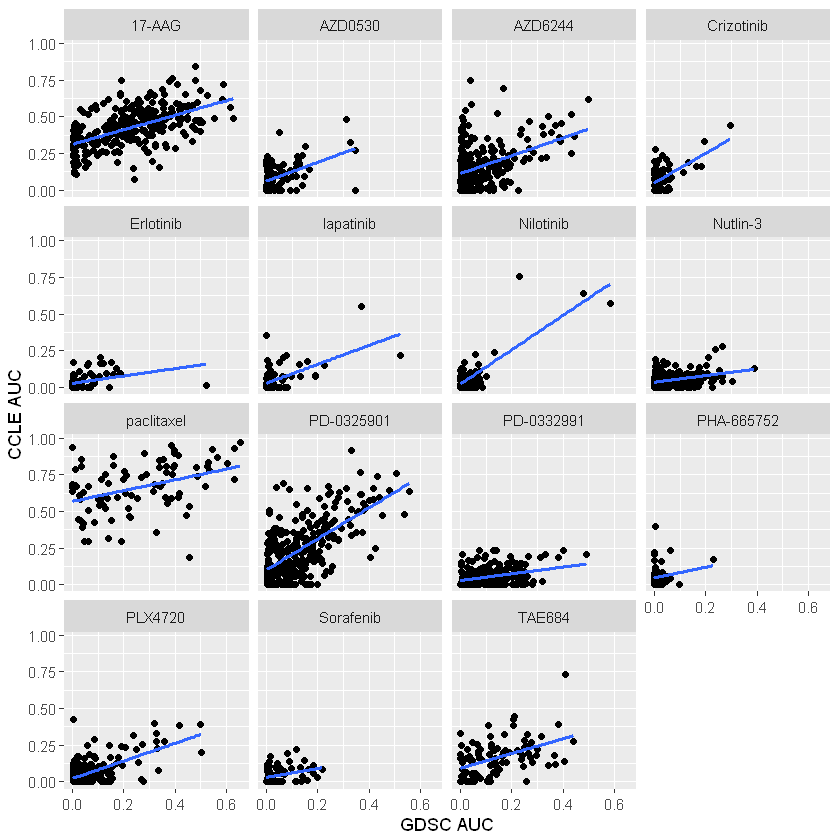

In [12]:
ggplot(summarizedData, aes(x = auc_GDSC, y = auc_CCLE)) +
  geom_jitter()+
  geom_smooth(method = 'lm', se = FALSE) +
  xlab("GDSC AUC") +
  ylab("CCLE AUC") +
  facet_wrap(.~drug)

2. Calculate correlation coefficients of the AUC in GDSC and CCLE for each drug (hint: code from Tutorial 2 may help). 

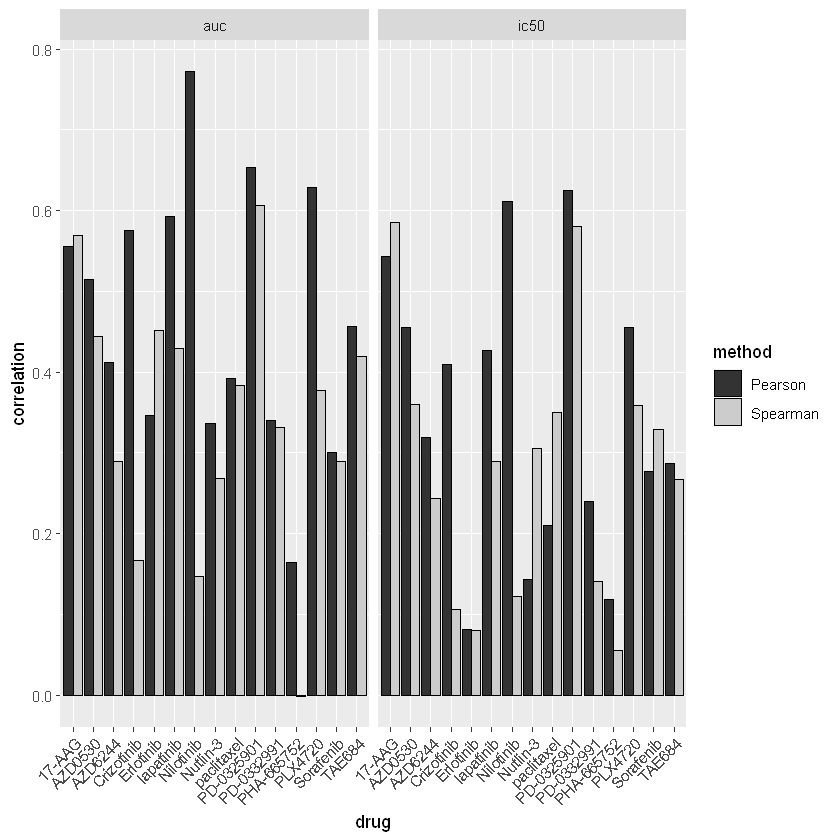

In [13]:
#Calculating both "Pearson" and "Spearman" correlations 
drugCorrs <- summarizedData %>% 
    group_by(drug) %>% 
    summarise(
        Pearson_ic50=cor(-log10(ic50_GDSC/10^6),-log10(ic50_CCLE/10^6), method="pearson"),
        Spearman_ic50=cor(-log10(ic50_GDSC/10^6),-log10(ic50_CCLE/10^6), method="spearman"),
        Pearson_auc=cor(auc_GDSC,auc_CCLE, method="pearson"),
        Spearman_auc=cor(auc_GDSC,auc_CCLE, method="spearman")) %>%
    gather(measure, correlation, -drug) %>%
    separate(measure, c('method', 'measure'), sep = '_')

#Plotting correlation results 
drugCorrs %>% 
ggplot(aes(x=drug, y=correlation, fill=method, group=method)) +
    geom_bar(stat="identity", position=position_dodge(), colour="black") + 
    facet_grid(.~measure) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    scale_fill_grey()

In [14]:
drugCorrs %>%
    group_by(method,measure) %>%
    summarise(mean(correlation))

method,measure,mean(correlation)
<chr>,<chr>,<dbl>
Pearson,auc,0.4691744
Pearson,ic50,0.3469128
Spearman,auc,0.3448531
Spearman,ic50,0.2782506


3. Based on the scatterplot and correlation values, would you say that they tend to agree? Why or why not?

> By visually inspecting the plots, I would say both studies don't tend to agree. Most of the data is concentrated in a single spot and seems to have no pattern aside from some outliers that are sqewing the trend lines. Furthermore, the correlation values don't go over 0.5 meaning there is marginal agreement between the studies. Thus, I would say both analyses tend to agree. 

4. Does the AUC or IC50 suggest more agreement between the studies? 

> According to the correlation values, AUC suggests more agreement between the studies.

5. Which drug do you think shows the most consistency between the studies? How about the least? 

In [15]:
#Drug with the most consistency between studies
drugCorrs %>%
    group_by(method) %>%
    filter(correlation == max(correlation), measure == 'auc')

#Drug with the least consistency between studies
drugCorrs %>%
    filter(measure == 'auc') %>%
    arrange(correlation) %>%
    head(n = 5)

drug,method,measure,correlation
<chr>,<chr>,<chr>,<dbl>
Nilotinib,Pearson,auc,0.7720569
PD-0325901,Spearman,auc,0.6067146


drug,method,measure,correlation
<chr>,<chr>,<chr>,<dbl>
PHA-665752,Spearman,auc,-0.001375766
Nilotinib,Spearman,auc,0.147075571
PHA-665752,Pearson,auc,0.163964424
Crizotinib,Spearman,auc,0.166548923
Nutlin-3,Spearman,auc,0.268779285


> Since AUC shows greater agreement between studies, we'll use it to choose which are the drugs with the highest and lowerst consistency between studies. 'PHA-665752' has the correlation score that is closest to zero, making it the drug with the least consistency between studies. We selected 'PD-0325901' as the drug with the most consistency because Spearman correlation is more robust to outliers which the drug 'Nilotinib' has.

6. If you calculated more than one type of correlation coefficient (for example Pearson and Spearman), how do they differ? Which do you think is a better summary of the consistency between the two studies?

> A Pearson correlation will test if the data follows a straight line. On the other hand, a Spearman correlation tests if an increase or decrease of one variable causes and increase or decrease of the other but, not necessarily in a straight line. Since the studies used different concentrations and steps in between the concentrations, they may have many outliers. Thus, a Spearman correlation should be used since it's more robust to outliers. 

 7. We have explored Pearson and Spearman correlation, but what about other correlation measures? For example, you could try out distance correlation, which is sensitive to nonlinear relationships. You can find this measure in the `energy` R package, which you'll need to install and load with the following commands:

In [16]:
require(energy)

Loading required package: energy
Warning message:
"package 'energy' was built under R version 3.5.3"

Then, you can compute distance correlation with the `dcor()` function. How does this correlation measure compare to Pearson and Spearman? Do your conclusions about the agreement between the two studies change at all using this measure?

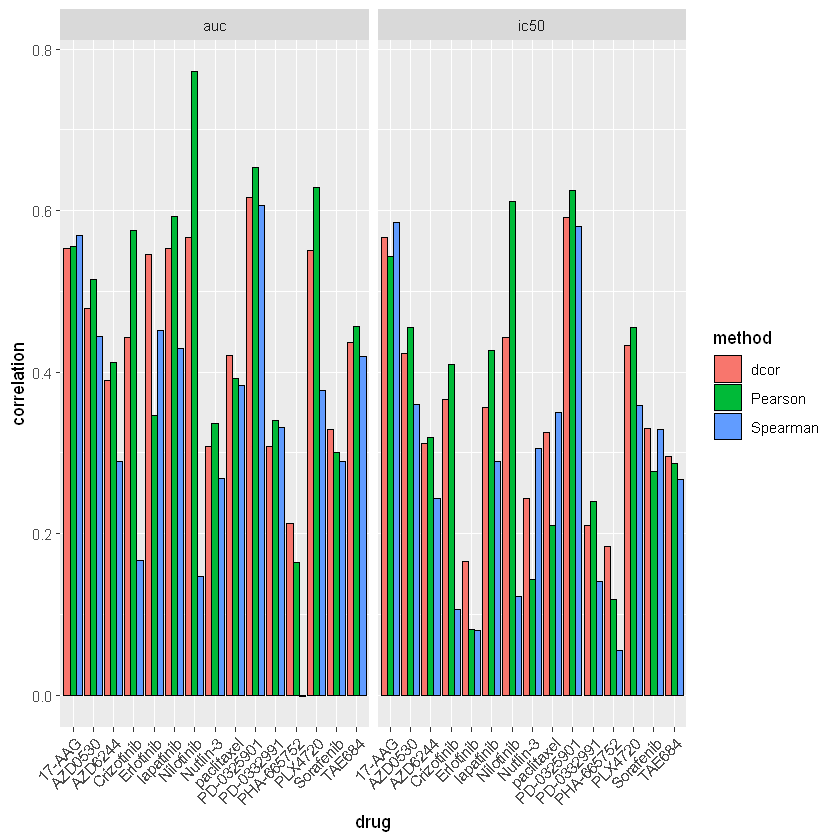

In [17]:
#Adding dcor to our corralations
drugCorrs <- summarizedData %>% 
    group_by(drug) %>% 
    summarise(
        Pearson_ic50=cor(-log10(ic50_GDSC/10^6),-log10(ic50_CCLE/10^6), method="pearson"),
        Spearman_ic50=cor(-log10(ic50_GDSC/10^6),-log10(ic50_CCLE/10^6), method="spearman"),
        dcor_ic50 = dcor(-log10(ic50_GDSC/10^6),-log10(ic50_CCLE/10^6)),
        Pearson_auc=cor(auc_GDSC,auc_CCLE, method="pearson"),
        Spearman_auc=cor(auc_GDSC,auc_CCLE, method="spearman"),
        dcor_auc = dcor(auc_GDSC,auc_CCLE)) %>%
    gather(measure, correlation, -drug) %>%
    separate(measure, c('method', 'measure'), sep = '_')

#Plotting correlation results 
drugCorrs %>% 
ggplot(aes(x=drug, y=correlation, fill=method, group=method)) +
    geom_bar(stat="identity", position=position_dodge(), colour="black") + 
    facet_grid(.~measure) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [18]:
drugCorrs %>%
    group_by(method,measure) %>%
    summarise(mean(correlation))

method,measure,mean(correlation)
<chr>,<chr>,<dbl>
dcor,auc,0.4474683
dcor,ic50,0.3498877
Pearson,auc,0.4691744
Pearson,ic50,0.3469128
Spearman,auc,0.3448531
Spearman,ic50,0.2782506


> The correlation method applied by dcor gives results very similar to those of a Pearson correlation. In the grand scheme of things, my conclusions about the agreement between the studies doesn't change much, however, I would choose differently which specific drugs are viewed as the ones with the least and most agreement between the studies.

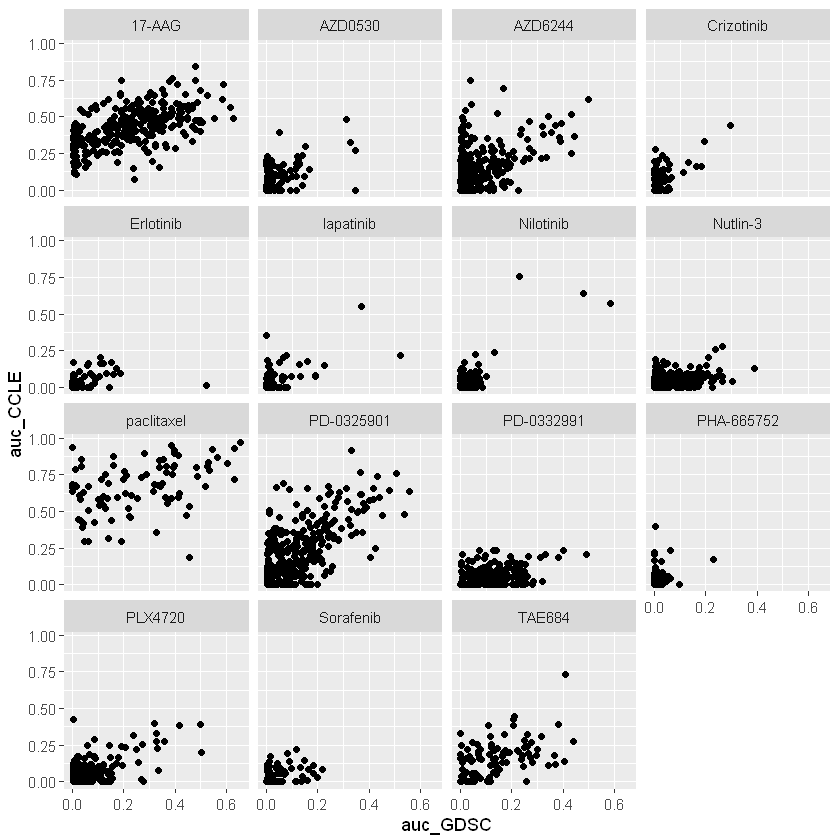

In [19]:

ggplot(summarizedData, aes(x=auc_GDSC, y=auc_CCLE)) +
  geom_jitter()+
  facet_wrap(~drug)


### Identifying biological factors that influence replicability of pharmacogenomic studies

1. Are there any cell lines that seem to be consistently sensitive? (Hint: look for the 5 cell lines which seem the most resistant in both studies according to the average drug response by AUC; code from Tutorial 3 may help) What effect might this have on your conclusions and interpretations of the agreement between the studies? For example, do you observe any increase in replicability (as measured by correlation of drug response) if you exclude the most resistant cell lines?

In [20]:
summarizedData[order(summarizedData$auc_GDSC),][1:5,c(1,2,6)]
summarizedData[order(summarizedData$auc_CCLE),][1:5,c(1,2,4)]


cellLine,drug,auc_GDSC
<chr>,<chr>,<dbl>
DMS-114,Erlotinib,0.000322
P31-FUJ,PHA-665752,0.000325
P31-FUJ,Erlotinib,0.000326
SK-MM-2,AZD0530,0.000905
HH,Erlotinib,0.000906


cellLine,drug,auc_CCLE
<chr>,<chr>,<dbl>
22RV1,Nilotinib,0
769-P,Nilotinib,0
A172,Nilotinib,0
A2058,Nilotinib,0
AN3-CA,Nilotinib,0


Particularly resistant cell lines will change the apparent effectiveness of a treatment if their not representative of the norm.

2. Classify each cell line as resistant or sensitive to a drug based on its AUC value (Hint: choose a cutoff for which cell lines with AUC below the cutoff are considered sensitive and explain your choice of cutoff(s); code from Tutorial 3 may help). Compare the resistance status of cell lines in GDSC and CCLE for each drug using either a scatterplot of AUC values colored by resistance/sensitivity in each study or a table.

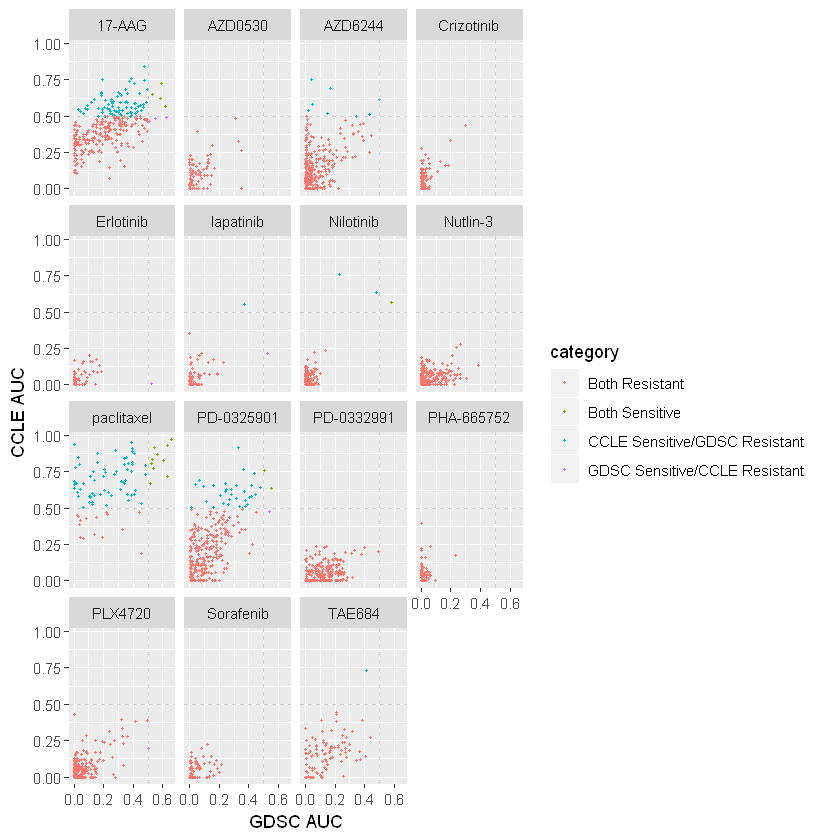

In [21]:
cutoff = 1/2
cellsumm <- summarizedData %>%
    group_by(drug,cellLine) %>%
    summarise(sensitive_CCLE=mean(auc_CCLE)>cutoff,
              sensitive_GDSC=mean(auc_GDSC)>cutoff,
              auc_CCLE,
              auc_GDSC,
              category= ifelse(mean(auc_CCLE)>cutoff&mean(auc_GDSC)>cutoff,"Both Sensitive",
                        ifelse(mean(auc_CCLE)>cutoff,"CCLE Sensitive/GDSC Resistant",
                        ifelse(mean(auc_GDSC)>cutoff,"GDSC Sensitive/CCLE Resistant","Both Resistant"))),
                        sensitivity_GDSC=ifelse(mean(auc_GDSC)>cutoff,"Sensitive","Resistant"),
                        sensitivity_CCLE=ifelse(mean(auc_CCLE)>cutoff,"Sensitive","Resistant")
             )
ggplot(aes(x=auc_GDSC, y=auc_CCLE, colour=category),data=cellsumm) +
    geom_point(cex=0.5) +
    facet_wrap(facets=~drug) +
    xlab("GDSC AUC") +
    ylab("CCLE AUC") +
    geom_hline(aes(yintercept=cutoff), colour="grey", alpha=0.75, lty=2) +
    geom_vline(aes(xintercept=cutoff), colour="grey", alpha=0.75, lty=2)
#head(cellsumm)


A cutoff of 0.5 was chosen, showing most cellines are resistant to their administered drugs. 0.5 was chosen since if it didnt show more than half sensitivity it isnt sensitive.

3. Compute the Matthews correlation coefficient for sensitivity status (from #2) of cell lines in GDSC and CCLE for each drug (Hint: code from Tutorial 3 may help). 

drug,matthews_corr
<chr>,<dbl>
17-AAG,0.10077037
AZD0530,0.00000000
AZD6244,0.00000000
Crizotinib,0.00000000
Erlotinib,0.00000000
lapatinib,-0.01176471
Nilotinib,0.57470792
Nutlin-3,0.00000000
paclitaxel,0.16018293


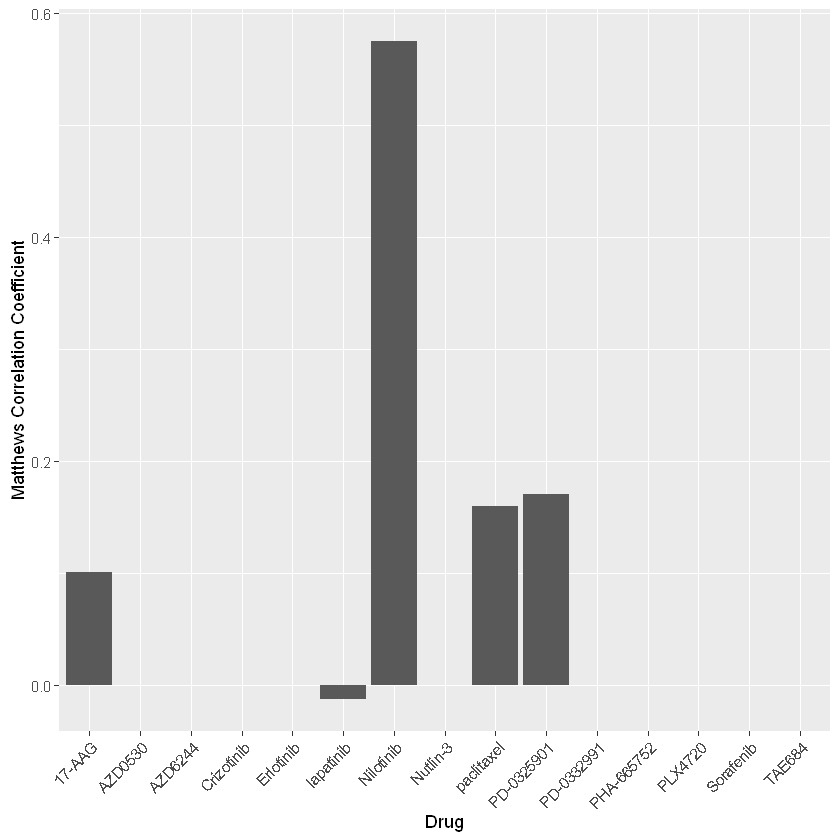

In [22]:
mcc <- function (study1, study2)
{
  BS <- sum(study1 == "Sensitive" & study2 == "Sensitive")
  BR <- sum(study1 == "Resistant" & study2 == "Resistant")
  SR <- sum(study1 == "Sensitive" & study2 == "Resistant")
  RS <- sum(study1 == "Resistant" & study2 == "Sensitive")

  if (BS+SR == 0 | BS+RS == 0 | BR+SR == 0 |  BR+RS ==0){
    mcc <- ((BS*BR)-(SR*RS))
  }else{
    mcc <- ((BS*BR)-(SR*RS)) / sqrt(exp((log(BS+SR)+log(BS+RS)+log(BR+SR)+log(BR+RS))))
  }
  return(mcc)
}
drugCorrs <- cellsumm %>%
  group_by(drug) %>%
  summarise(matthews_corr=mcc(sensitivity_GDSC, sensitivity_CCLE))

drugCorrs

ggplot(data=drugCorrs, aes(x=drug, y=matthews_corr)) +
  geom_bar(stat="identity") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  xlab("Drug")+
  ylab("Matthews Correlation Coefficient")

4. Are there any drugs for which most or all cell lines seem to be resistant in both studies (Hint: for each cell line, look at its average response across all drugs; code from Tutorial 3 may help)? If so, what are the correlation values for these drugs? What do these results imply about the replicability of these studies?

17-AAG       0.10077037

Nilotinib	 0.57470792

PD-0325901	 0.17063474

lapatinib	-0.01176471

paclitaxel	 0.16018293


5. Compare the Matthews correlation coefficient values by drug classes defined in Tutorial 3 (No effect, Narrow effect, Broad effect). Which drug class shows the most agreement between the studies?

* **No effect**: minimal observed resposne for all cell lines
    + AZD0530
    + crizotinib
    + sorafenib
    + nutlin-3
    + PD-0332991
    + erlotinib
    + TAE684
    + PHA-665752
* **Narrow effect**: response in only a small subset of cell lines
    + AZD6244
    + 17-AAG
    + nilotinib
    + lapatinib
    + PLX44720
* **Broad effect**: response in a large number of cell lines
    + PD-0325901
    + paclitaxel

6. Would you say that the sensitivity results for the two studies tend to agree?


I would say they disagree.

7. For one of the targeted drugs, examine the cell lines that were sensitive ih the CCLE and/or GDSC. See if you can find out what types of cells these are by searching the online Cancer Cell Line Encyclopedia http://www.broadinstitute.org/ccle (this will prompt you to register with a username, password, and email address. If you prefer, you can also search the cell line on other websites). See if you can find out what types of cancers this drug is targeted for using the NCI cancer drug database at https://www.cancer.gov/about-cancer/treatment/drugs. Does the list of cell lines found to be sensitive in the two studies agree with this?

### paclitaxel

Treatment of breast, ovarian, lung, bladder, prostate, melanoma, esophageal, as well as other types of solid tumor cancers. It has also been used in Kaposi's sarcoma.

### Modeling the relation between two variables (drug concentration vs viability)

1. Explore the response curves for several drug-cell line combinations. How many drugs-cell line combinations contain viability response values that would potentially enable them to be summarized into an IC50 value? You can answer this, for example, by checking whether there are viability values below 50%.

In [23]:
rawPharmacoData %>%
  count(viability >= 50)


viability >= 50,n
<lgl>,<int>
FALSE,4716
TRUE,38711


2. Analyze the re-calculations of IC50 and AUCs from the drug 17-AAG in the H4 cell-line and the drug Nilotinib cell-line in the 22RV1 cell-line. See the figure below and asnwer: which statistic is more roboust, IC50 or AUC? Which statistic is more generalizable, IC50 or AUC? Justify your answer with examples and/or using the whole data recalculations from the *mySummarizedData* variable.

<img src="Figures/reproducible.png" width="400px" height="200px" />
Modified from [Kirstie Whitaker](https://github.com/KirstieJane/).


In [24]:
str(summarizedData)

subset(summarizedData, (cellLine == '22RV1' & drug == 'Nilotinib') | (cellLine == 'H4' & drug == '17-AAG'))


Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	2557 obs. of  6 variables:
 $ cellLine : chr  "22RV1" "5637" "639-V" "697" ...
 $ drug     : chr  "Nilotinib" "Nilotinib" "Nilotinib" "Nilotinib" ...
 $ ic50_CCLE: num  8 7.48 8 1.91 8 ...
 $ auc_CCLE : num  0 0.00726 0.07101 0.15734 0 ...
 $ ic50_GDSC: num  155.27 219.93 92.18 3.06 19.63 ...
 $ auc_GDSC : num  0.00394 0.00362 0.00762 0.06926 0.02876 ...
 - attr(*, "spec")=
  .. cols(
  ..   cellLine = col_character(),
  ..   drug = col_character(),
  ..   ic50_CCLE = col_double(),
  ..   auc_CCLE = col_double(),
  ..   ic50_GDSC = col_double(),
  ..   auc_GDSC = col_double()
  .. )


cellLine,drug,ic50_CCLE,auc_CCLE,ic50_GDSC,auc_GDSC
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
22RV1,Nilotinib,8.0000000,0.0000000,155.26991662,0.003935
H4,17-AAG,0.1507716,0.4868125,0.03090495,0.551570


3. Are the results more replicable if one uses the same code to calculate IC50 or AUC on the different datasets? Hint: you can use code from tutorial #3 to evaluate this.

According to the figure, the results should be more replicable. 


4. Summarize the viability curves of all the drugs in each cell-line using the slope of linear model. Is the slope of the linear regression informative of the drug response? Can we improve the replicability of the studies by using the value of the slope instead of IC50s or AUCs? 

The slope informs us that the lower the drug concentration the higher the viability. This means that, as one would expect, more cells will survive if less of the drug is used and vice-versa. It seems that it is better to use the values of the slope for better replicability.   


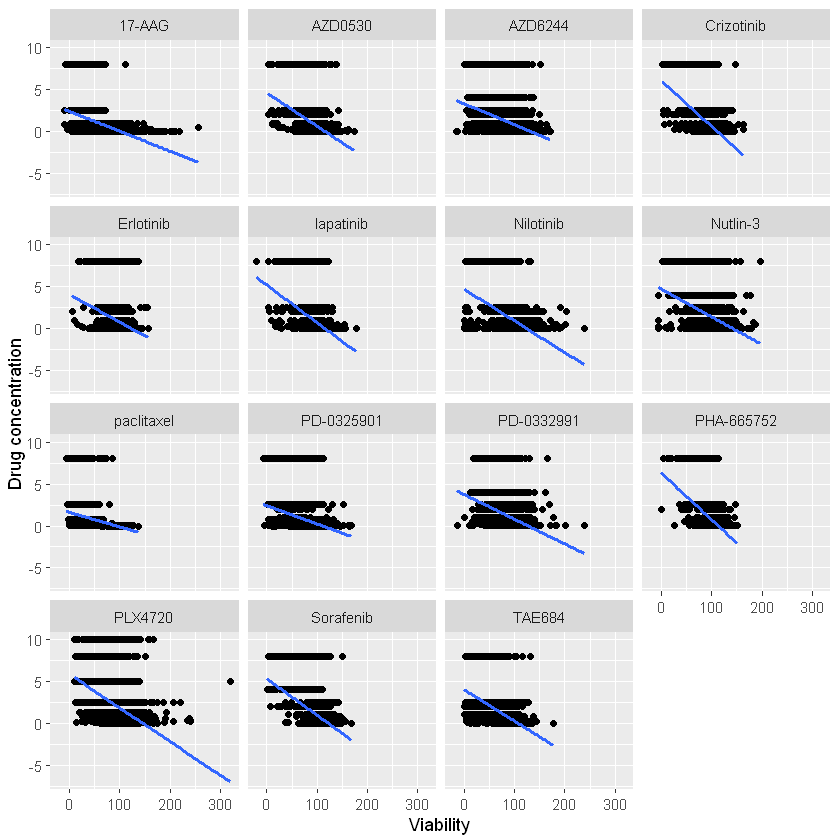

In [25]:
#each graph would be of a drug depicting viability of one study versus the other by scatter

ggplot(rawPharmacoData, aes(x = viability, y = concentration)) +
  geom_jitter()+
  geom_smooth(method = 'lm', se = FALSE) +
  xlab("Viability") +
  ylab("Drug concentration") +
  facet_wrap(~drug)
